# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [85]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
!pip install xgboost 
from xgboost import XGBClassifier

In [2]:
data=pd.read_csv('EasyVisa.csv')

In [3]:
df=data.copy()

## Data Overview

- Observations
- Sanity checks

In [4]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [6]:
df.shape

(25480, 12)

#### Observation:
There are 25480 rows and 12 columns in this dataset

In [7]:
#Code to check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


#### Observations:
- There are 2 only columns with integer data types ( no_of_employees and yr_of_estab).
- There is only one column with float data types (prevailing_wage)
- All other columns have object data types

In [8]:
#Changing year of establishment into a categorical data type
df["yr_of_estab"] = df.yr_of_estab.astype("category")

In [9]:
#Changing object data types of into categorical variables
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])

df.info()  # Use info() to print a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  category
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(10), float64(1), int64(1)
memory usage: 1.9 MB


#### Observation:
- ALL object data types are now categorical
- Storage memory has reduced from 2.3+ MB to 1.9MB

In [10]:
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

#### Observation:
There is no missing data

In [11]:
# checking for duplicate values
df.duplicated().sum()

0

#### Observation:
There are no duplicated values in this data set

In [12]:
#Code to check for number of unique values in each data set
df.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

In [13]:
#Statistical summary of numerical values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


#### Observation: 
- The mean and median values of 'no_of_employees' are 5667.04 and 2109.00 respectively.
- The mean and median values for 'prevailing_wage' are 74455.81 and 70308 respectively

In [14]:
#Dropping case_id column before proceeding with data analysis as it does not contain significant variables for this purpose
df1 = df.drop(["case_id"], axis=1)

In [15]:
df1.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### A) Number of employees

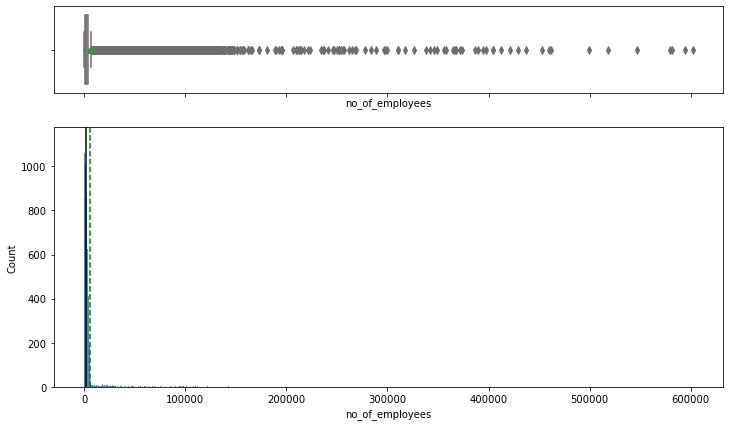

In [18]:
histogram_boxplot(df1, "no_of_employees")

#### Observation:
The distribution is skewed to the right, and there are many outliers.

### B) Prevailing wage

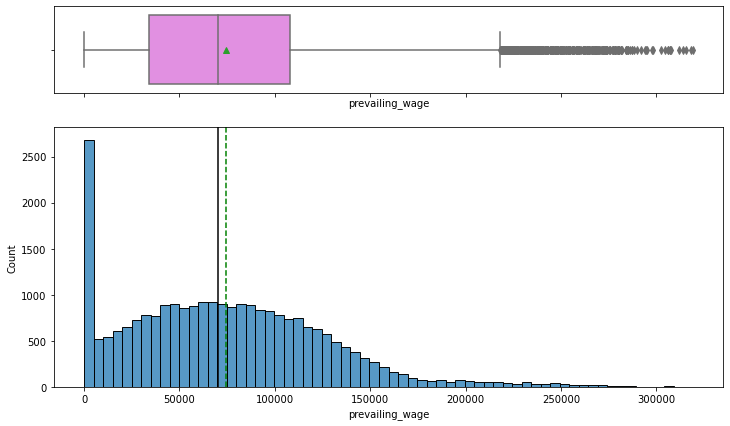

In [19]:
histogram_boxplot(df1, "prevailing_wage")

#### Observation:
- Data is right-skewed with many outliers.
- 0 has the highest count among all observations
- The mean and median are consistent with that of the statistical summary.

### C) Continent

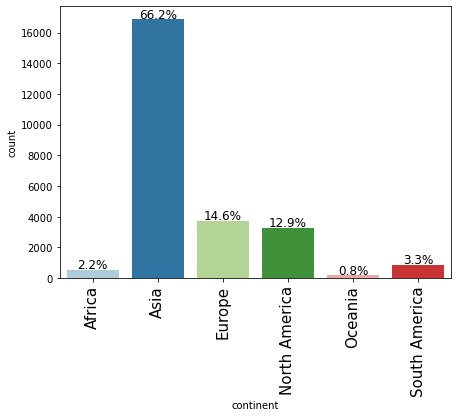

In [20]:
labeled_barplot(df1, "continent", perc=True)

#### Observation:
- Most of the applicants are from Asia followed by Europe, North America, South America, Africa and Oceania in that order.

### D) Education of employees

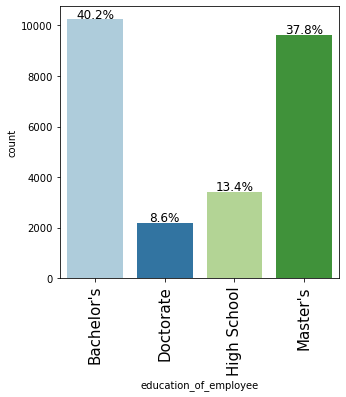

In [21]:
labeled_barplot(df1, "education_of_employee", perc=True)

#### Observation:
- Majority of employees (40.2%) have a Bachelor's degree. 
- 37.8% have a Master's degree.
- 13.4% have a High school diploma
- 8.6% of employees have a Doctorate

### E) Job Experience

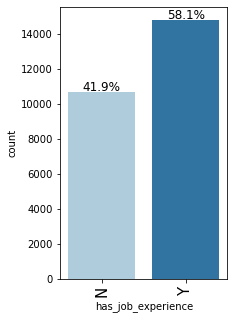

In [22]:
labeled_barplot(df1, "has_job_experience", perc=True)

#### Observation:
- 58.1% of employees have job experience

### F) Job training requirement

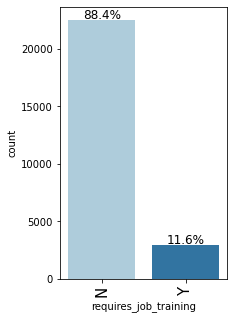

In [23]:
labeled_barplot(df1, "requires_job_training", perc=True)

#### Observation:
88.4% of employees do not require job training


### G) Year of establishment

In [24]:
df1['yr_of_estab'].value_counts(ascending=False)

1998    1134
2005    1051
2001    1017
2007     994
1999     870
        ... 
1807       6
1822       4
1846       4
1810       3
1824       2
Name: yr_of_estab, Length: 199, dtype: int64

#### Observation: 
- 1134 companies were established in 1998
- Only 2 were establishd in 1824

### H) Region of employment

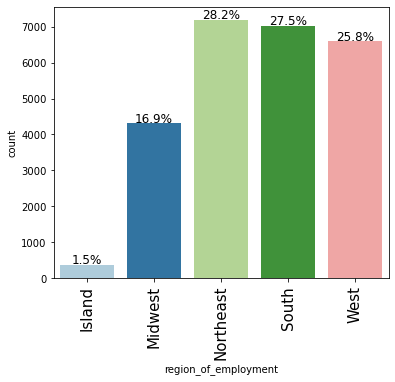

In [25]:
labeled_barplot(df1, "region_of_employment", perc=True)

#### Observation:
- The North east has the most employee applications (28.2)%
- The region with the least applications is Island (1.5%)

### I) Unit_of_wage

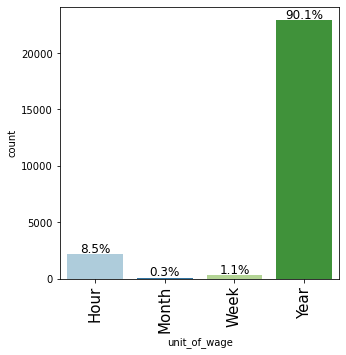

In [26]:
labeled_barplot(df1, "unit_of_wage", perc=True)

#### Observation:
90.1% of employees will be paid per year/ annual salary

### J) Full_time_position

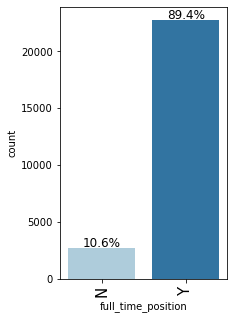

In [27]:
labeled_barplot(df1, "full_time_position", perc=True)

#### Observation: 
- 89.4% of the employees are being taken on as full time staff

### K) Case_status

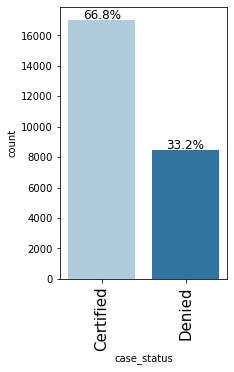

In [28]:
labeled_barplot(df1, "case_status", perc=True)

#### Observation:
66.8% of cases were certified while 33.2% were denied

### Bivariate Analysis

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [29]:
# Code for stacked plots in bivariate analysis
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Question 1: Education vs Visa Certification

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
case_status                                                               
All                         10234       2192         3420      9634  25480
Certified                    6367       1912         1164      7575  17018
Denied                       3867        280         2256      2059   8462
------------------------------------------------------------------------------------------------------------------------


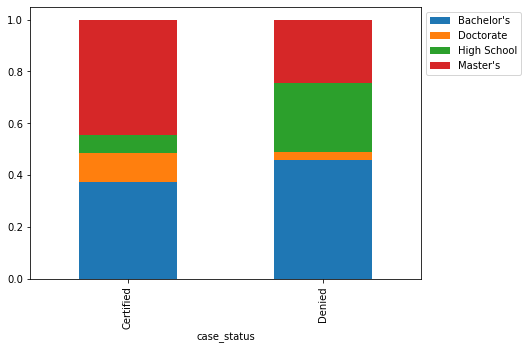

In [30]:
stacked_barplot(df1, "case_status", "education_of_employee")

#### Observation:
The higher the level of education, the more likely the employee to receive visa certification.

### Question 2: Visa Certification vs Continents

continent    Africa   Asia  Europe  North America  Oceania  South America  \
case_status                                                                 
All             551  16861    3732           3292      192            852   
Certified       397  11012    2957           2037      122            493   
Denied          154   5849     775           1255       70            359   

continent      All  
case_status         
All          25480  
Certified    17018  
Denied        8462  
------------------------------------------------------------------------------------------------------------------------


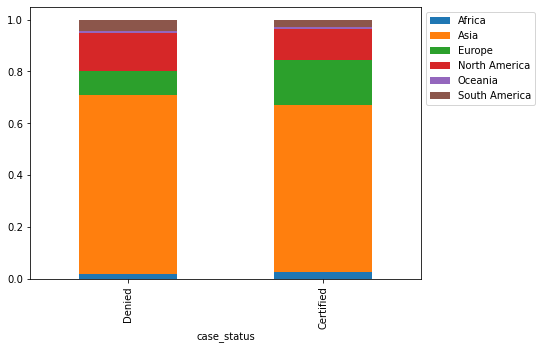

In [31]:
stacked_barplot(df1, "case_status", "continent")

#### Observation:
- Employees from Europe are more likely to get visa certifications.
- The probability of denial or certification is almost equal for Africa and South America.
- More candidates from Asia and North America were denied than approved.

### Question 3: Work experience vs Visa Status

has_job_experience      N      Y    All
case_status                            
All                 10678  14802  25480
Certified            5994  11024  17018
Denied               4684   3778   8462
------------------------------------------------------------------------------------------------------------------------


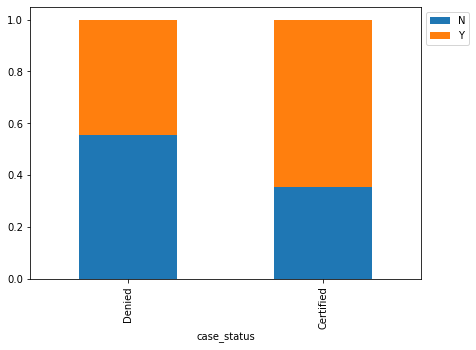

In [32]:
stacked_barplot(df1, "case_status", "has_job_experience")

#### Observation:
More of the certified cases had job experience

### Question 4: Pay unit vs Visa certification


unit_of_wage  Hour  Month  Week   Year    All
case_status                                  
All           2157     89   272  22962  25480
Certified      747     55   169  16047  17018
Denied        1410     34   103   6915   8462
------------------------------------------------------------------------------------------------------------------------


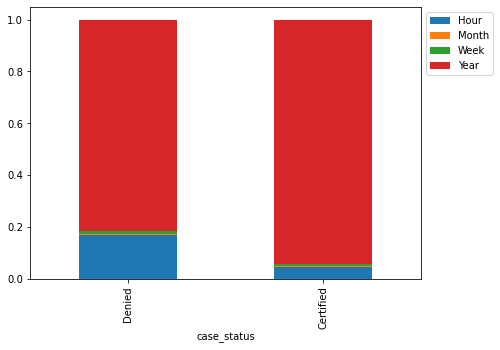

In [33]:
stacked_barplot(df1, "case_status", "unit_of_wage")

#### Observation:
Most certified cases are paid yearly

### Question 5: Visa status vs prevailing wage

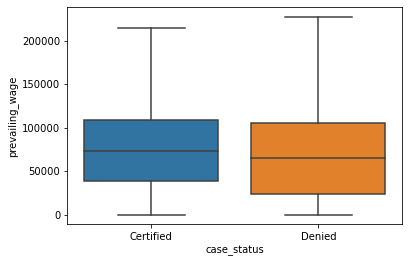

In [34]:
sns.boxplot(data=df1, x='case_status', y='prevailing_wage', showfliers=False) #showfliers command turns off outliers
plt.show()

#### Observation
The average prevailing wage is higher among those who receieved certified visas.

### Visa status vs Region

region_of_employment  Island  Midwest  Northeast  South  West    All
case_status                                                         
All                      375     4307       7195   7017  6586  25480
Certified                226     3253       4526   4913  4100  17018
Denied                   149     1054       2669   2104  2486   8462
------------------------------------------------------------------------------------------------------------------------


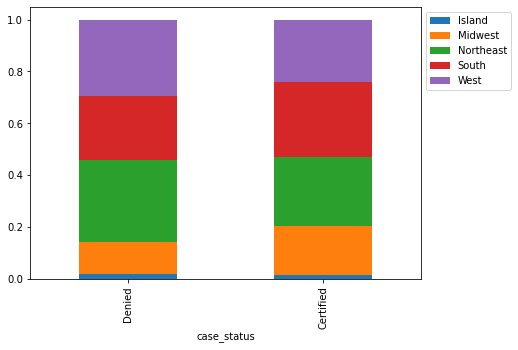

In [35]:
stacked_barplot(df1, "case_status", "region_of_employment")

#### Observation:
Case certification and denial are distributed equally across regions

### Visa status vs Job training requirement

requires_job_training      N     Y    All
case_status                              
All                    22525  2955  25480
Certified              15012  2006  17018
Denied                  7513   949   8462
------------------------------------------------------------------------------------------------------------------------


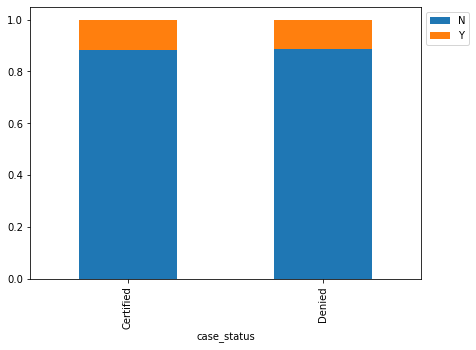

In [36]:
stacked_barplot(df1, "case_status", "requires_job_training")

#### Observation:
An employee requiring on-the-job training this not affect the case status

### Pairplot

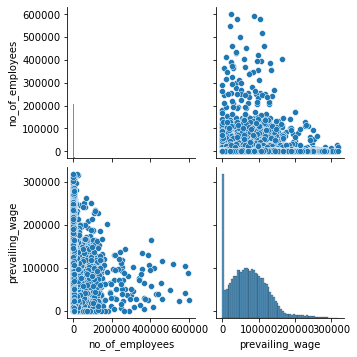

In [37]:
sns.pairplot(df1)
plt.show()

### Heatmap

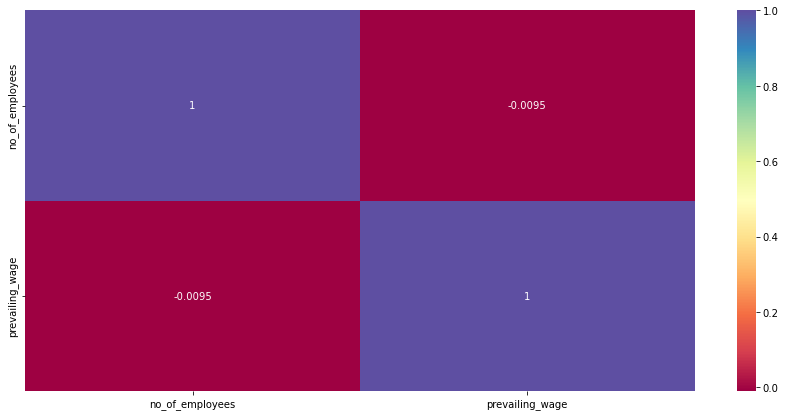

In [38]:
corr = df1.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, cmap="Spectral")
plt.show()

#### Observation;
There is weak correlation among the numerical variables of the dataset

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Outlier detection

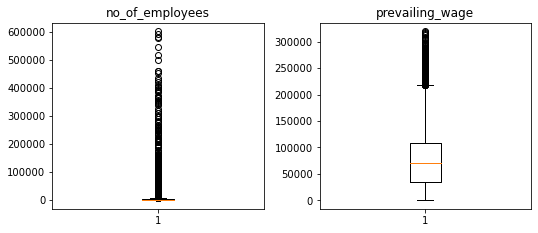

In [39]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Outliers will not be treated as they are considered significant

### Preparing data for modeling

In [40]:
# Replace entries in 'has_job_experience', 'requires_job_training', 'full_time_position' and 'case-status' with zeros and ones
replaceStruct = {"has_job_experience": {"N":0, "Y":1},
                 'requires_job_training':{"N":0, "Y":1}, 
                 'full_time_position': {"N":0, "Y":1},
                 "case_status": {"Denied": 0, "Certified": 1}}
df1 = df1.replace(replaceStruct)
df1.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,0,0,14513,2007,West,592.2029,Hour,1,0
1,Asia,Master's,1,0,2412,2002,Northeast,83425.6500,Year,1,1
2,Asia,Bachelor's,0,1,44444,2008,West,122996.8600,Year,1,0
3,Asia,Bachelor's,0,0,98,1897,West,83434.0300,Year,1,0
4,Africa,Master's,1,0,1082,2005,South,149907.3900,Year,1,1


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [41]:
df1.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,0,0,14513,2007,West,592.2029,Hour,1,0
1,Asia,Master's,1,0,2412,2002,Northeast,83425.6500,Year,1,1
2,Asia,Bachelor's,0,1,44444,2008,West,122996.8600,Year,1,0
3,Asia,Bachelor's,0,0,98,1897,West,83434.0300,Year,1,0
4,Africa,Master's,1,0,1082,2005,South,149907.3900,Year,1,1


In [42]:
df1.shape

(25480, 11)

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  int64   
 3   requires_job_training  25480 non-null  int64   
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  category
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  int64   
 10  case_status            25480 non-null  int64   
dtypes: category(5), float64(1), int64(5)
memory usage: 1.3 MB


In [44]:
df1.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [45]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
has_job_experience,25480.0,0.580926,0.493417,0.0000,0.00,1.00,1.0000,1.00
requires_job_training,25480.0,0.115973,0.320199,0.0000,0.00,0.00,0.0000,1.00
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
full_time_position,25480.0,0.893760,0.308151,0.0000,1.00,1.00,1.0000,1.00
case_status,25480.0,0.667896,0.470977,0.0000,0.00,1.00,1.0000,1.00


## Building bagging and boosting models

### Split the dataset

In [46]:
# Separating features and the target column
X = df1.drop('case_status', axis=1)
y = df1['case_status']

In [47]:
X = pd.get_dummies(X, drop_first=True)


In [48]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

In [49]:
X_train.shape, X_test.shape

((17836, 218), (7644, 218))

#### Observation:
There are 17,836 observations in the train set and 7,644 observations in the test set.

## Build Models

In [50]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [51]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

### Decision Tree Model

In [ ]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

In [ ]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Bagging Model

In [52]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [53]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9825633550123346
Accuracy on test set :  0.7123233908948194
Recall on training set :  0.9852145995268672
Recall on test set :  0.7946738710922424
Precision on training set :  0.9884716453335594
Precision on test set :  0.783932990671997


 The model is over-fitting

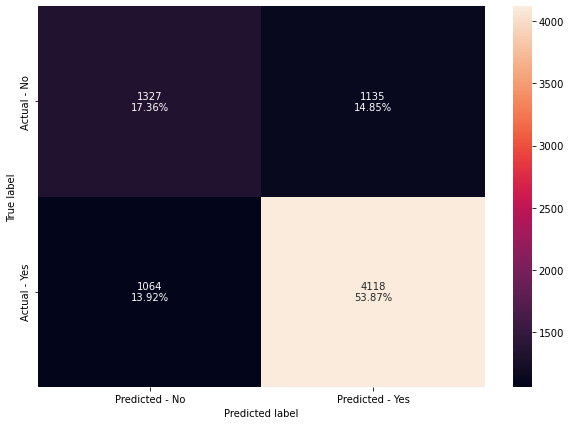

In [54]:
make_confusion_matrix(bagging_estimator,y_test)

### Random Forest Classifier

In [55]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [56]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  0.999943933617403
Accuracy on test set :  0.7271062271062271
Recall on training set :  1.0
Recall on test set :  0.8429177923581629
Precision on training set :  0.9999155191349159
Precision on test set :  0.774468085106383


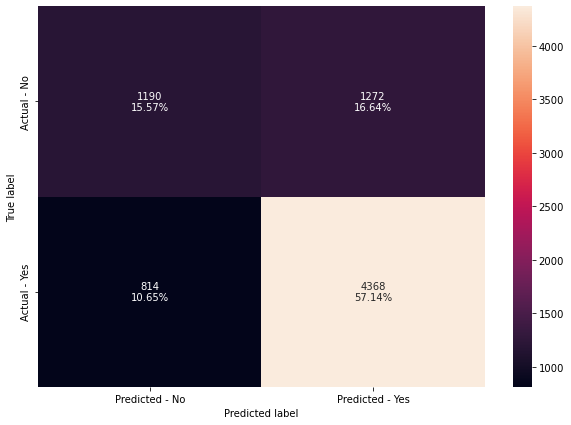

In [57]:
make_confusion_matrix(rf_estimator,y_test)

#### Observation:
With default parameters:
- Both models - Bagging classifiers as well as random forest classifier are overfitting the train data.

### Hyperparameter Tuning

### Bagging Classifier

In [58]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=20,
                  random_state=1)

In [59]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.6636017044180309
Accuracy on test set :  0.6779173207744636
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.6636017044180309
Precision on test set :  0.6779173207744636


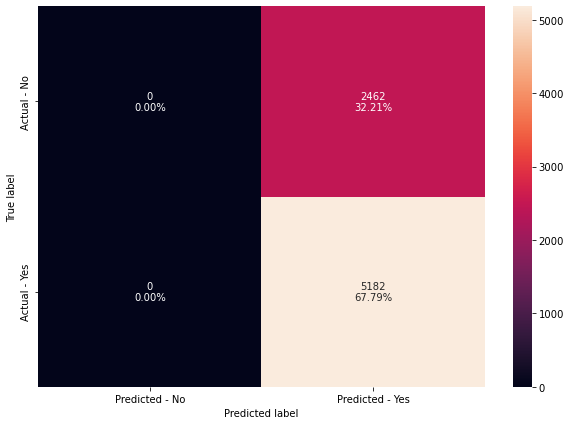

In [60]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

#### Observation:
- The model is no longer overfitting.
- Although accuracy is not a high as desired, the performance is similar on both raning and testing data sets.
- Recall is 100% on both data sets.
- The model is better at picking up certified visa statuses than the denied cases

###  Using logistic regression as the base estimator for bagging classifier

In [61]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear',random_state=1,max_iter=1000),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

In [62]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_lr_score=get_metrics_score(bagging_lr)

Accuracy on training set :  0.6636017044180309
Accuracy on test set :  0.6779173207744636
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.6636017044180309
Precision on test set :  0.6779173207744636


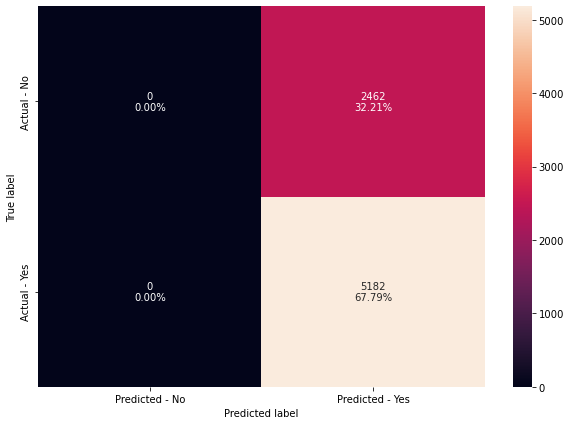

In [63]:
make_confusion_matrix(bagging_lr,y_test)

#### Observation:
- The model is not overfitting.
- Although accuracy is not a high as desired, the performance is similar on both raning and testing data sets.
- Recall is 100% on both data sets.
- The model is better at picking up certified visa statuses than the denied cases

### Random Forest Classifier

In [64]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [15,26,5],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": ['sqrt', 'log2'],
    "max_samples": np.arange(5, 10, 5),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', max_samples=5, min_samples_leaf=5,
                       n_estimators=15, random_state=1)

In [65]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.6636017044180309
Accuracy on test set :  0.6779173207744636
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.6636017044180309
Precision on test set :  0.6779173207744636


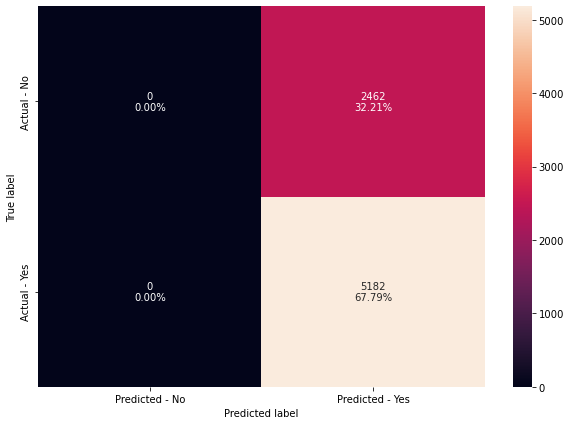

In [66]:
make_confusion_matrix(rf_estimator_tuned,y_test)

#### Observation:
- The model accuracy has decreased but the overfitting has also been reduced and the model is generalizing well.
- The train and test recall both have increased significantly.
- The random forest model is also better at identifying certified cases than denied

### Using class_weights for random forest

In [79]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.4, 1: 0.6}],
    "n_estimators": [15, 26, 5],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": ['sqrt', 'log2'],
    "max_samples": np.arange(5,10,5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.4, 1: 0.6}, max_features='sqrt',
                       max_samples=5, min_samples_leaf=5, n_estimators=15,
                       random_state=1)

In [80]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.6636017044180309
Accuracy on test set :  0.6779173207744636
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.6636017044180309
Precision on test set :  0.6779173207744636


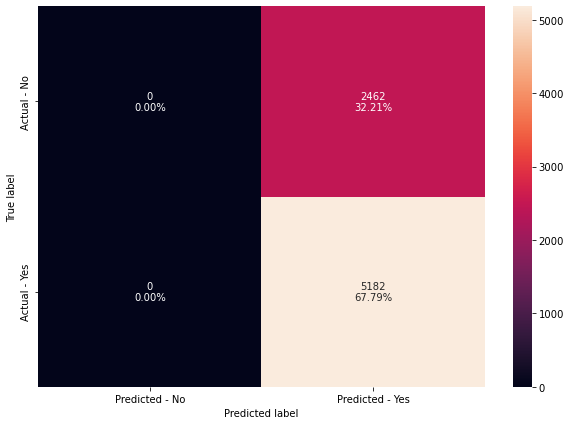

In [81]:
make_confusion_matrix(rf_estimator_weighted,y_test)

#### Observation
Even with a weighted random forest classifier, this model is better at detecting certified cases than denied

### Importance of features

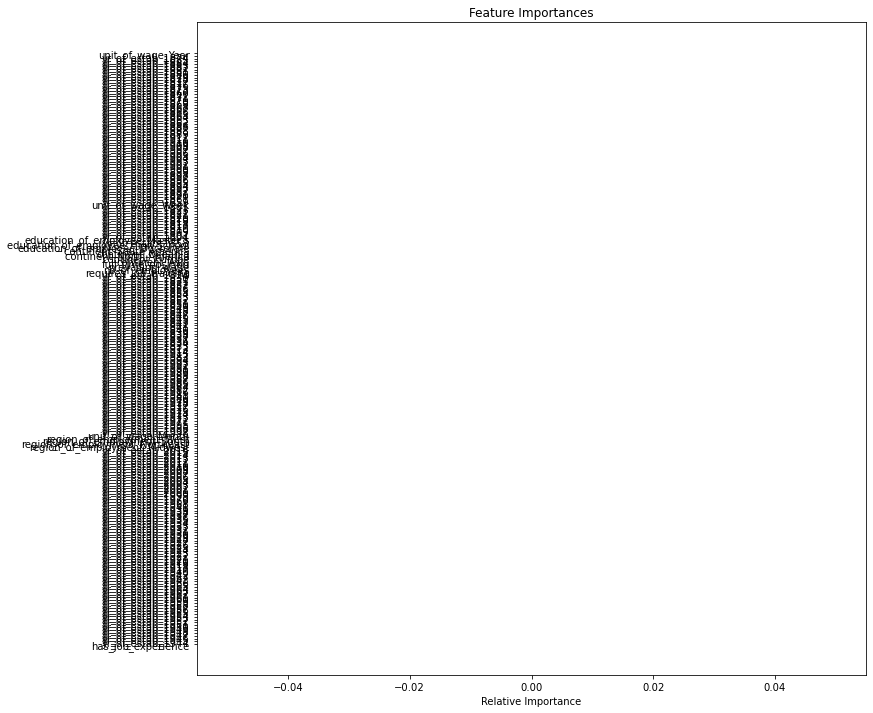

In [77]:
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Comparing bagging models 


In [82]:
# defining list of models
models = [bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [83]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters',
                                         'Tuned Random Forest Classifier','Random Forest with class_weights'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Bagging classifier with default parameters,0.98,0.71,0.99,0.79,0.99,0.78
1,Tuned Bagging Classifier,0.66,0.68,1.00,1.00,0.66,0.68
2,Bagging classifier with base_estimator=LR,0.66,0.68,1.00,1.00,0.66,0.68
3,Random Forest with deafult parameters,1.00,0.73,1.00,0.84,1.00,0.77
4,Tuned Random Forest Classifier,0.66,0.68,1.00,1.00,0.66,0.68
5,Random Forest with class_weights,0.66,0.68,1.00,1.00,0.66,0.68


## Boosting Models

### 1. AdaBoost

In [88]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [89]:
#Code to determine accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.7378896613590491
Accuracy on test set :  0.7363945578231292
Recall on training set :  0.8850963163230822
Recall on test set :  0.8805480509455809
Precision on training set :  0.7596258429410485
Precision on test set :  0.7657325054539352


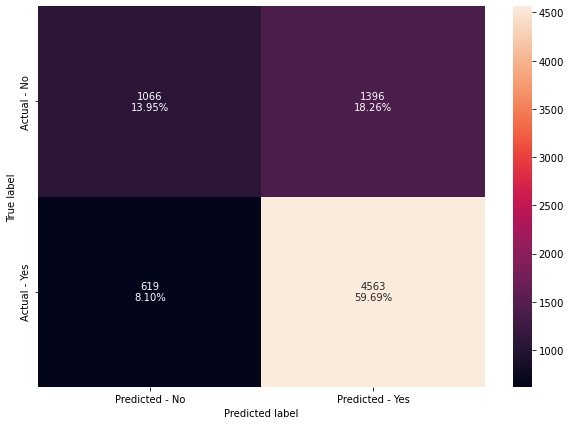

In [90]:
make_confusion_matrix(abc,y_test)

### 2. Gradient Boosting Classifier

In [91]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [92]:
#Determining accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.7562794348508635
Accuracy on test set :  0.7494767137624281
Recall on training set :  0.8768164920581277
Recall on test set :  0.8676186800463142
Precision on training set :  0.7822416522197935
Precision on test set :  0.7853275109170306


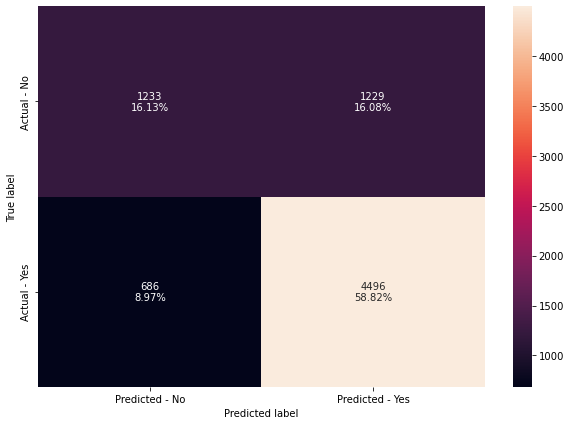

In [93]:
make_confusion_matrix(gbc,y_test)

### 3. XGBoost Classifier

In [94]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [95]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.8029266651715631
Accuracy on test set :  0.7378335949764521
Recall on training set :  0.9074011490368368
Recall on test set :  0.8566190659976843
Precision on training set :  0.8161714415989056
Precision on test set :  0.7787719298245614


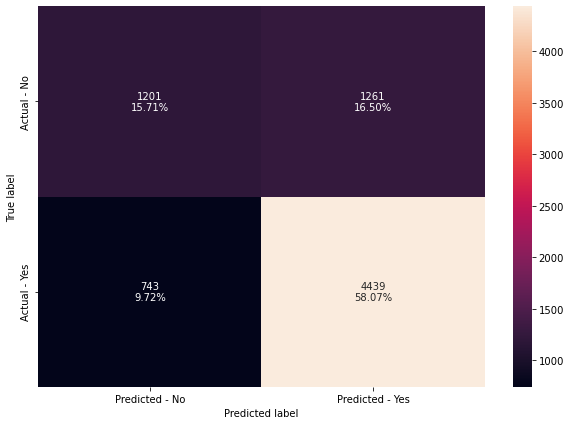

In [96]:
make_confusion_matrix(xgb,y_test)

#### Observations:
- Using default parameters, Adaboost and Gradient boosting are not overfitting and have similar performance on both training and testing sets.
- XGBoost is overfitting

### Hyperparameter Tuning

### 1. AdaBoost Classifier

In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

In [ ]:
make_confusion_matrix(abc_tuned,y_test)

#### Observation:
The model is overfitting the train data as train accuracy is much higher than the test accuracy.
The model has low test recall. This implies that the model is not good at identifying defaulters.

importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observation:


### 2. Gradient Boosting Classifier

In [ ]:
#Using AdaBoost classifier as the estimator for initial predictions
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

In [ ]:
gbc_init_score=get_metrics_score(gbc_init)

Test accuracy and test recall have increased slightly.
As we are getting better results, we will use init = AdaBoostClassifier() to tune the gradient boosting model.

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

In [ ]:
#Accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

In [ ]:
make_confusion_matrix(gbc_tuned,y_test)

#### Observation:
The model performace has not increased by much.
The model has started to overfit the train data in terms of recall.
It is better at identifying non-defaulters than identifying defaulters which is the opposite of the result we need.

In [ ]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observation:


### 3. XGBoost Classifier

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

In [ ]:
xgb_tuned_score=get_metrics_score(xgb_tuned)

In [ ]:
make_confusion_matrix(xgb_tuned,y_test)

#### Observation:
The test accuracy of the model has reduced as compared to the model with default parameters but the recall has increased significantly and the model is able to identify most of the defaulters.
Decreasing number of false negatives has increased the number of false positives here.
The tuned model is not overfitting and generalizes well.

In [ ]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observation:

##  Will tuning the hyperparameters improve the model performance?

Yes. From the above demonstration, tuning hyperparameters improve model performance

## Model Performance Comparison and Conclusions

## Actionable Insights and Recommendations